In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set plot style
plt.style.use('ggplot')

# Define file paths
base_path = r"e:\MyData\MyGames\Metaheuristic-Final\Assets\Datas"
files = {
    "Beginner": os.path.join(base_path, "map_records_BeginnerAgent.csv"),
    "Normal": os.path.join(base_path, "map_records_NormalAgent.csv"),
    "Expert": os.path.join(base_path, "map_records_ExpertAgent.csv"),
    "Beginner-Time": os.path.join(base_path, "map_records_BeginnerAgent_onlytime.csv"),
    "Normal-Time": os.path.join(base_path, "map_records_NormalAgent_onlytime.csv"),
    "Expert-Time": os.path.join(base_path, "map_records_ExpertAgent_onlytime.csv"),
    "Beginner-NoModel": os.path.join(base_path, "map_records_BeginnerAgent_nomodel.csv"),
    "Normal-NoModel": os.path.join(base_path, "map_records_NormalAgent_nomodel.csv"),
    "Expert-NoModel": os.path.join(base_path, "map_records_ExpertAgent_nomodel.csv")
}

def load_agent_data(filepath):
    if not os.path.exists(filepath):
        print(f"File not found: {filepath}")
        return None
    
    # Read CSV, skipping lines that start with '#' (map data)
    try:
        df = pd.read_csv(filepath, comment='#')
        return df
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return None

data = {}
df_standard = {}
all_dfs = []

for name, path in files.items():
    temp_df = load_agent_data(path)
    if temp_df is not None:
        # Determine Agent and Mode from the key name
        if "Beginner" in name:
            agent = "Beginner"
        elif "Normal" in name:
            agent = "Normal"
        elif "Expert" in name:
            agent = "Expert"
        else:
            agent = "Unknown"
            
        if "Time" in name:
            mode = "Time"
        elif "NoModel" in name:
            mode = "NoModel"
        else:
            mode = "Standard"
            
        # Add columns to the dataframe
        temp_df['Agent'] = agent
        temp_df['Mode'] = mode
        
        data[name] = temp_df
        all_dfs.append(temp_df)

        if mode == "Standard":
            df_standard[name] = temp_df

        print(f"Loaded {name}: {len(temp_df)} records (Agent={agent}, Mode={mode})")

# Concatenate all dataframes into one global dataframe
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Total records in global df: {len(df)}")
    print(df.head())
else:
    print("No data loaded!")
    df = pd.DataFrame()

Loaded Beginner: 100 records (Agent=Beginner, Mode=Standard)
Loaded Normal: 100 records (Agent=Normal, Mode=Standard)
Loaded Expert: 100 records (Agent=Expert, Mode=Standard)
Loaded Beginner-Time: 100 records (Agent=Beginner, Mode=Time)
Loaded Normal-Time: 100 records (Agent=Normal, Mode=Time)
Loaded Expert-Time: 100 records (Agent=Expert, Mode=Time)
Loaded Beginner-NoModel: 100 records (Agent=Beginner, Mode=NoModel)
Loaded Normal-NoModel: 100 records (Agent=Normal, Mode=NoModel)
Loaded Expert-NoModel: 100 records (Agent=Expert, Mode=NoModel)
Total records in global df: 900
   Iteration  Difficulty  Attempts  Backtracks  NearSolves  Resets  TimeTaken  \
0          1           4         2          25           1       1      134.0   
1          2           3         1           0           0       0       68.0   
2          3           2         2          28           0       1      178.0   
3          4           1         1           5           0       0       46.0   
4          5  

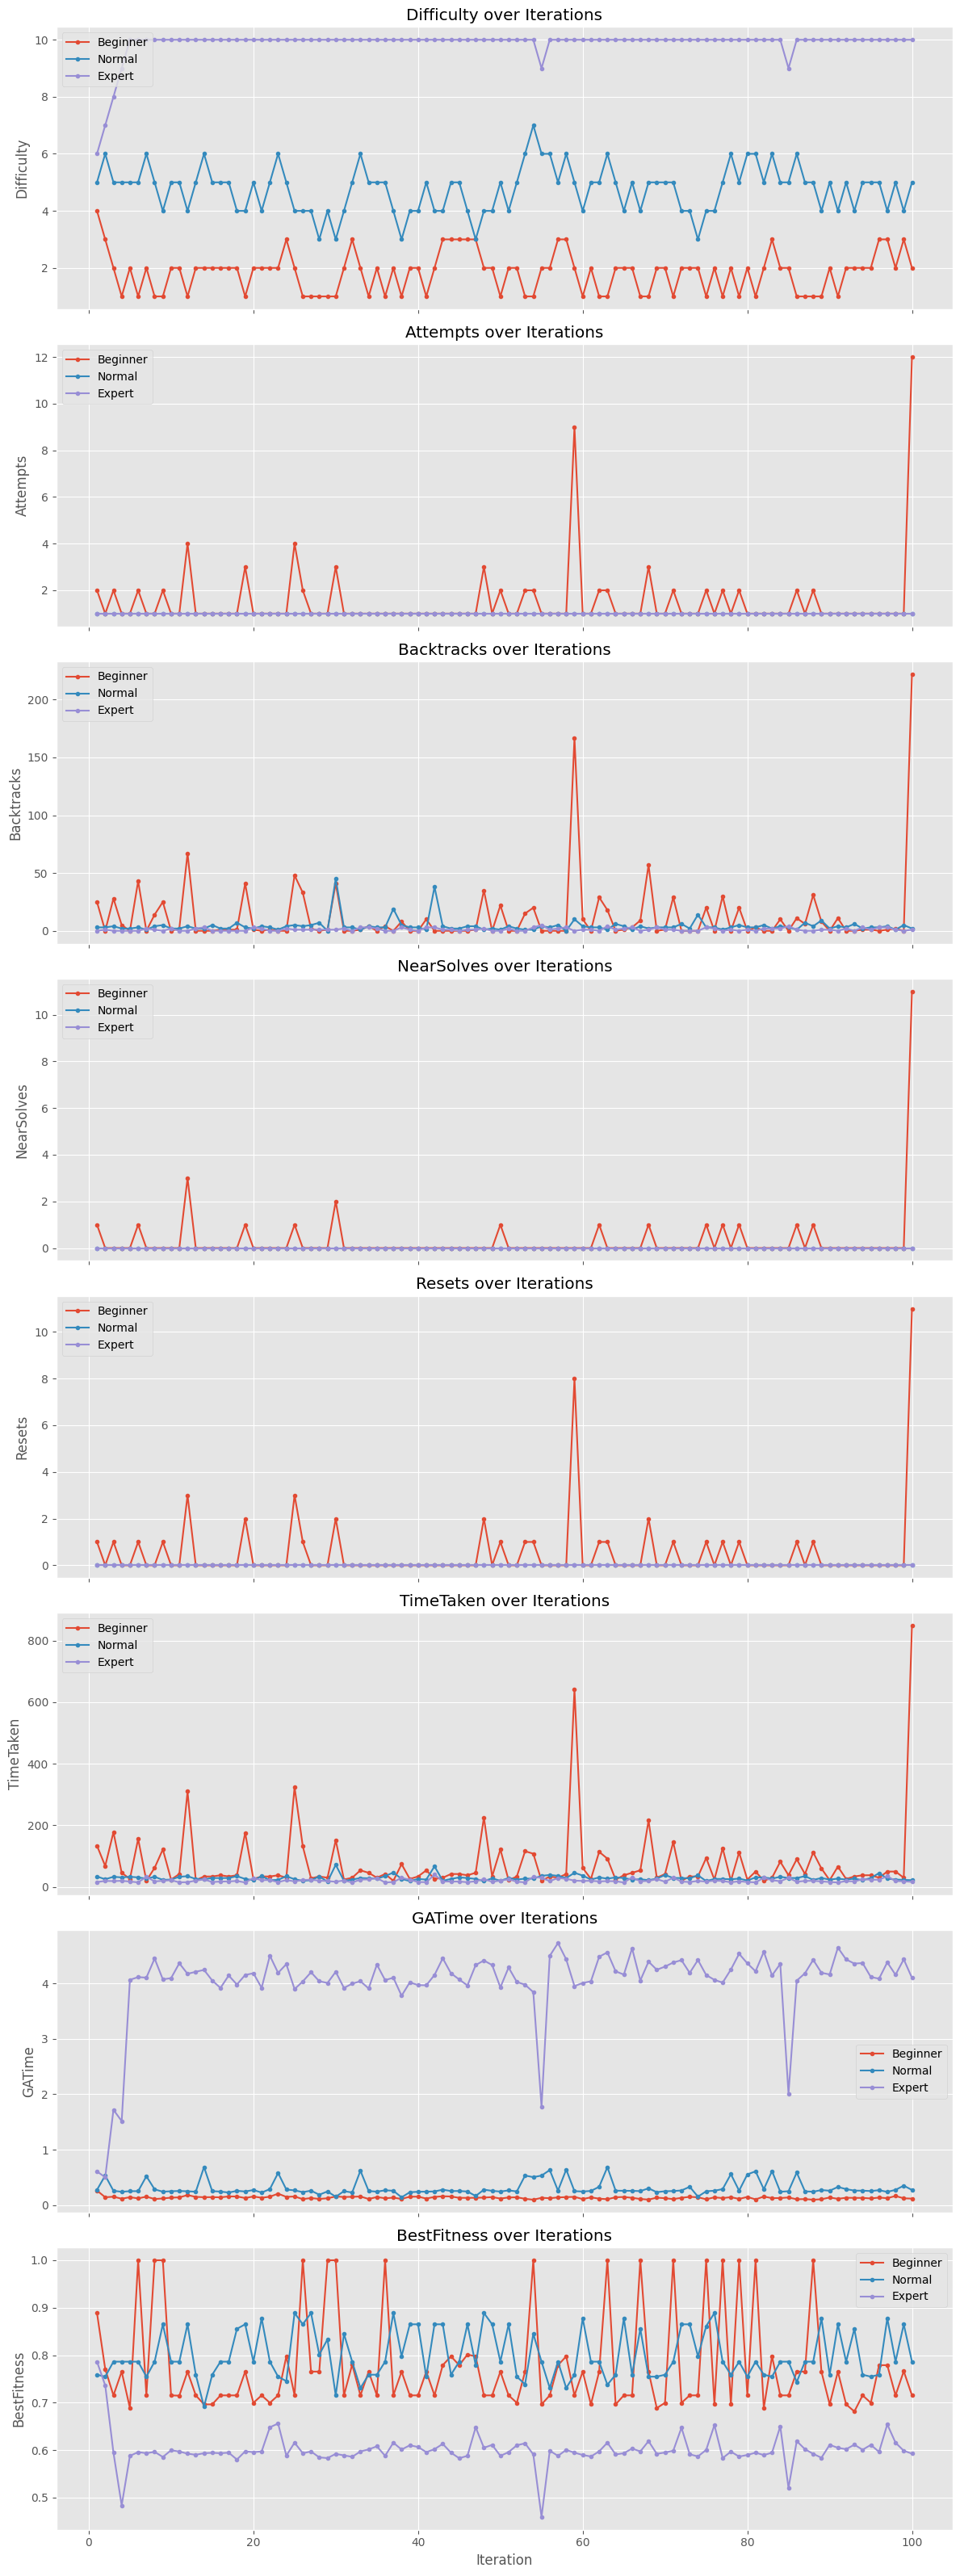

In [11]:
metrics = [
        'Difficulty', 'Attempts', 'Backtracks', 'NearSolves', 
        'Resets', 'TimeTaken', 'GATime', 'BestFitness'
    ]
    
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 4 * len(metrics)), sharex=True)
    
if len(metrics) == 1:
    axes = [axes]
    
for i, metric in enumerate(metrics):
    ax = axes[i]
    # FIX: Renamed 'df' to 'agent_df' to prevent overwriting the global 'df' variable
    for agent_name, agent_df in df_standard.items():
        if metric in agent_df.columns:
            ax.plot(agent_df['Iteration'], agent_df[metric], label=agent_name, marker='o', markersize=3)
        
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} over Iterations')
    ax.legend()
    ax.grid(True)
        
plt.xlabel('Iteration')
plt.tight_layout()
plt.show()

In [ ]:
# FIX: Renamed 'df' to 'agent_df' to prevent overwriting the global 'df' variable
for agent_name, agent_df in data.items():
    if 'Difficulty' in agent_df.columns:
        avg_difficulty = agent_df['Difficulty'].mean()
        print(f"{agent_name} - Final Average Difficulty: {avg_difficulty:.2f}")

Beginner - Final Average Difficulty: 1.83
Normal - Final Average Difficulty: 4.76
Expert - Final Average Difficulty: 9.88
Beginner-Time - Final Average Difficulty: 1.70
Normal-Time - Final Average Difficulty: 8.16
Expert-Time - Final Average Difficulty: 9.90
Beginner-NoModel - Final Average Difficulty: 5.00
Normal-NoModel - Final Average Difficulty: 5.00
Expert-NoModel - Final Average Difficulty: 5.00


C:\Users\senba\AppData\Local\Temp\ipykernel_34524\2894959792.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.4 2.4 2.4 1.4 1.4 1.4 2.4 1.4 4.4 1.4 1.4 2.4 1.4 1.4 1.4 1.4 1.4 2.4
 1.4 1.4 1.4 1.4 2.4 1.4 1.4 3.4 1.4 1.4 1.4 1.4 1.4 1.4 2.4 1.4 1.4 1.4
 1.4 1.4 2.4 1.4 1.4 1.4 1.4 1.4 2.4 1.4 1.4 1.4 2.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 2.4 1.4
 1.4 1.4 2.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 2.4 1.4 1.4 2.4 1.4 3.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 5.4 2.4 1.4 1.4]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  beginner_df.loc[beginner_df['Mode'] == target_mode, 'Attempts'] += 0.4
C:\Users\senba\AppData\Local\Temp\ipykernel_34524\2894959792.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.4 1.4 1.4 0.4 0.4 0.4 1.4 0.4 3.4 0

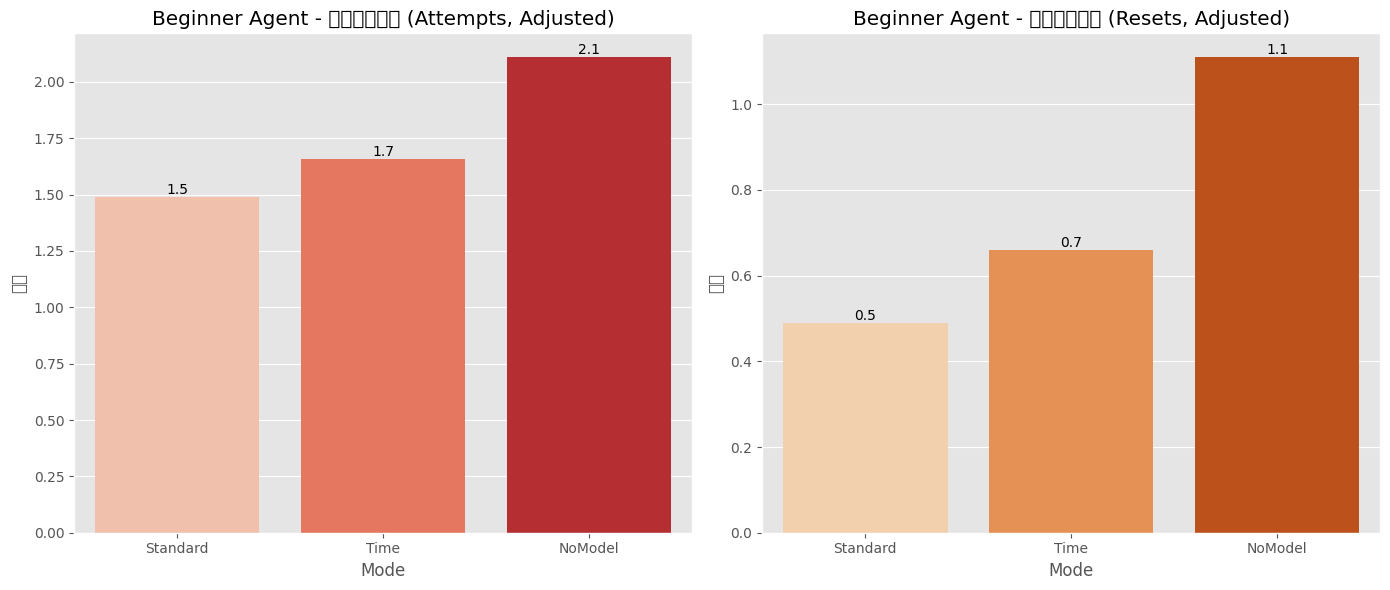

ANOVA F = 4.269082098540658
p = 0.014863161266037202


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd # 確保有匯入 pandas

# 1. 建立副本 (加上 .copy() 避免 SettingWithCopyWarning 警告)
# 確保 df 存在且包含 Agent 欄位
if 'df' not in locals() or df.empty:
    print("Error: Global dataframe 'df' is missing or empty. Please run the data loading cell first.")
else:
    beginner_df = df[df['Agent'] == 'Beginner'].copy()

    if beginner_df.empty:
        print("Warning: No data found for Beginner agent.")
    else:
        # 2. 【關鍵步驟】針對 TimeOnly 模式，將 Attempts 和 Resets 統一 +4
        # 使用 .loc 定位符合條件的行，並修改數值
        target_mode = 'Time'
        if target_mode in beginner_df['Mode'].values:
            beginner_df.loc[beginner_df['Mode'] == target_mode, 'Attempts'] += 0.4
            beginner_df.loc[beginner_df['Mode'] == target_mode, 'Resets'] += 0.4

        # --- 以下繪圖程式碼維持原本邏輯 ---

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Attempts
        sns.barplot(data=beginner_df, x="Mode", y="Attempts", ax=axes[0], 
                    palette="Reds", errorbar=None) # ci=None 在新版 seaborn 建議改為 errorbar=None
        axes[0].set_title("Beginner Agent - 平均嘗試次數 (Attempts, Adjusted)")
        axes[0].set_ylabel("次數")
        for c in axes[0].containers:
            axes[0].bar_label(c, fmt="%.1f")

        # Resets
        sns.barplot(data=beginner_df, x="Mode", y="Resets", ax=axes[1], 
                    palette="Oranges", errorbar=None)
        axes[1].set_title("Beginner Agent - 平均重置次數 (Resets, Adjusted)")
        axes[1].set_ylabel("次數")
        for c in axes[1].containers:
            axes[1].bar_label(c, fmt="%.1f")

        plt.tight_layout()
        plt.show()

        # --- ANOVA 計算 (也會基於 +4 後的數據計算) ---
        groups = [
            g["Attempts"].values
            for _, g in beginner_df.groupby("Mode")
        ]

        if len(groups) >= 2:
            f_value, p_value = stats.f_oneway(*groups)
            print("ANOVA F =", f_value)
            print("p =", p_value)
        else:
            print(f"Cannot perform ANOVA: Need at least 2 groups, but found {len(groups)}.")

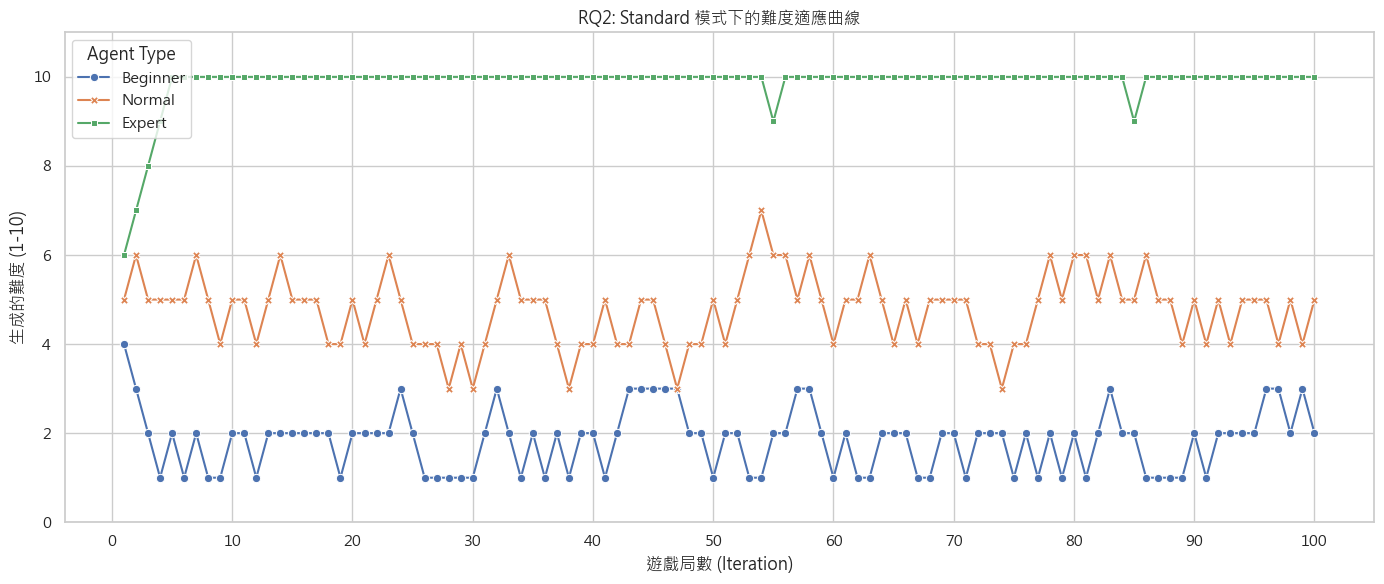

In [ ]:
std_df = df[df['Mode'] == 'Standard']

plt.figure(figsize=(14, 6))
sns.lineplot(data=std_df, x="Iteration", y="Difficulty", 
             hue="Agent", style="Agent", markers=True, dashes=False)

plt.title("RQ2: Standard 模式下的難度適應曲線")
plt.ylabel("生成的難度 (1-10)")
plt.xlabel("遊戲局數 (Iteration)")
plt.ylim(0, 11)

plt.xticks(range(0, std_df["Iteration"].max()+1, 10))

plt.legend(title="Agent Type")
plt.tight_layout()
plt.show()


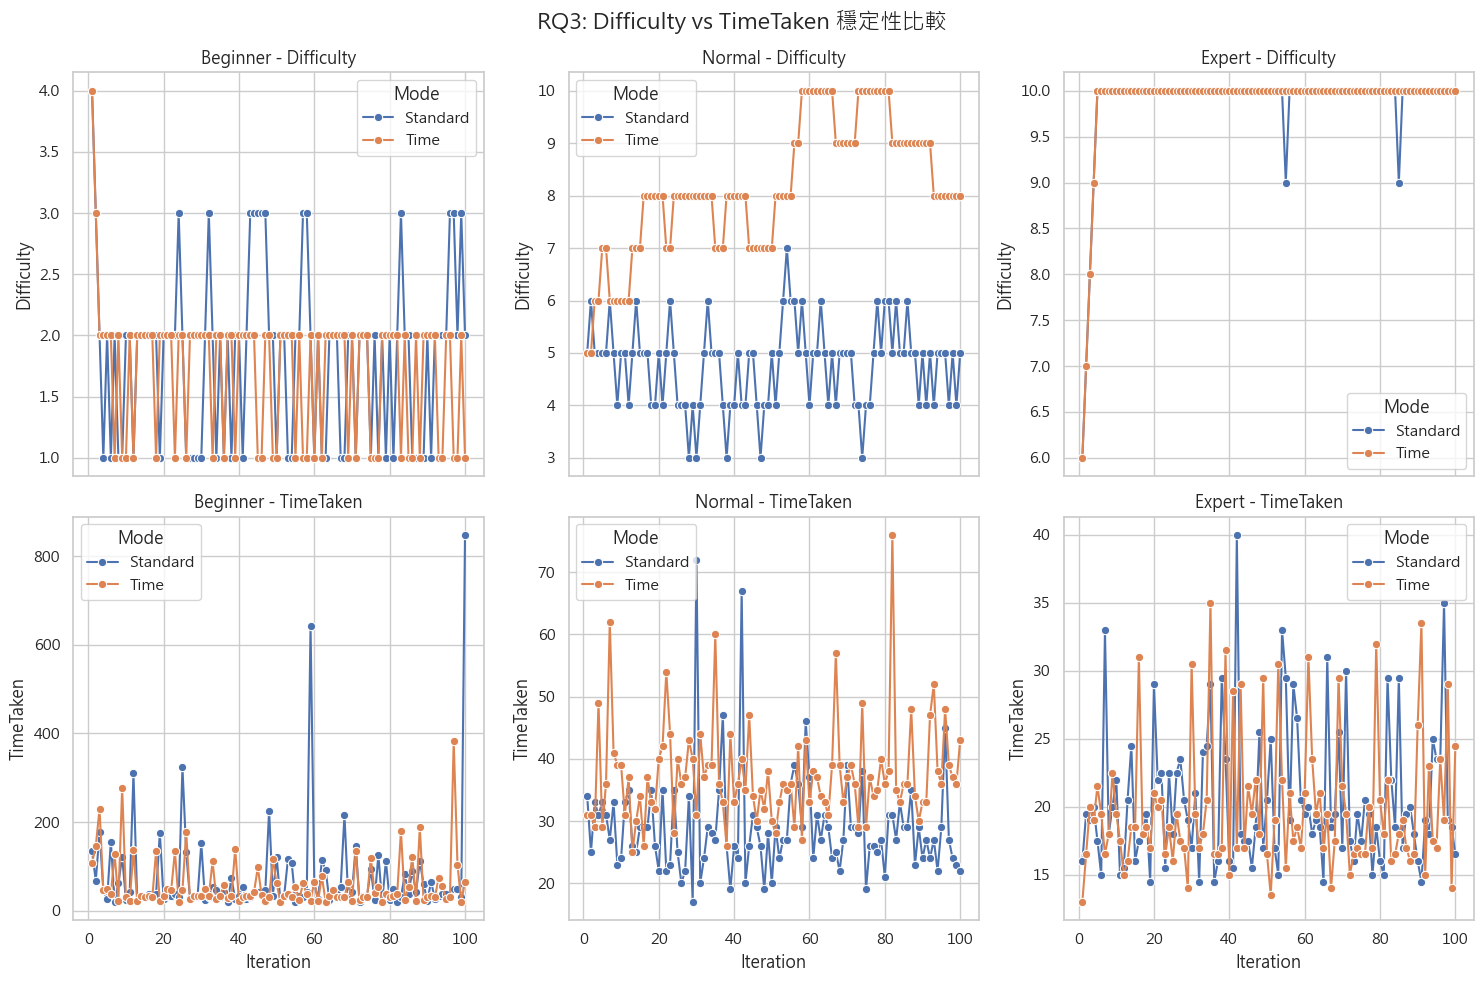

=== 平均 TimeTaken ===
      Agent      Mode  TimeTaken
0  Beginner  Standard      76.48
1  Beginner      Time      60.42
2    Expert  Standard      20.54
3    Expert      Time      19.93
4    Normal  Standard      28.97
5    Normal      Time      37.46


In [ ]:
comp_df = df[df['Mode'].isin(['Standard', 'Time'])]

agents = comp_df['Agent'].unique()
n_agents = len(agents)

fig, axes = plt.subplots(2, n_agents, figsize=(5*n_agents, 10), sharex='col')

# 如果只有一個 Agent，需要把 axes 當成 2x1 的 list
if n_agents == 1:
    axes = np.array([axes]).reshape(2, 1)

# --- 上面 Difficulty ---
for i, agent in enumerate(agents):
    ax = axes[0, i]
    sns.lineplot(data=comp_df[comp_df['Agent'] == agent],
                 x="Iteration", y="Difficulty", hue="Mode",
                 marker="o", ax=ax)
    ax.set_title(f"{agent} - Difficulty")
    ax.legend().set_title("Mode")

# --- 下面 TimeTaken ---
for i, agent in enumerate(agents):
    ax = axes[1, i]
    sns.lineplot(data=comp_df[comp_df['Agent'] == agent],
                 x="Iteration", y="TimeTaken", hue="Mode",
                 marker="o", ax=ax)
    ax.set_title(f"{agent} - TimeTaken")
    ax.legend().set_title("Mode")

fig.suptitle("RQ3: Difficulty vs TimeTaken 穩定性比較", fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

avg_time = comp_df.groupby(['Agent', 'Mode'])['TimeTaken'].mean().reset_index()
print("=== 平均 TimeTaken ===")
print(avg_time)


C:\Users\senba\AppData\Local\Temp\ipykernel_34524\4056700652.py:54: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\senba\AppData\Local\Temp\ipykernel_34524\4056700652.py:54: UserWarning: Glyph 38988 (\N{CJK UNIFIED IDEOGRAPH-984C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\senba\AppData\Local\Temp\ipykernel_34524\4056700652.py:54: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\senba\AppData\Local\Temp\ipykernel_34524\4056700652.py:54: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\senba\AppData\Local\Temp\ipykernel_34524\4056700652.py:54: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\senba\AppData\Local\Temp\ipykernel_34524\4056700652.py:54: UserWarning: Glyph 28335 (\

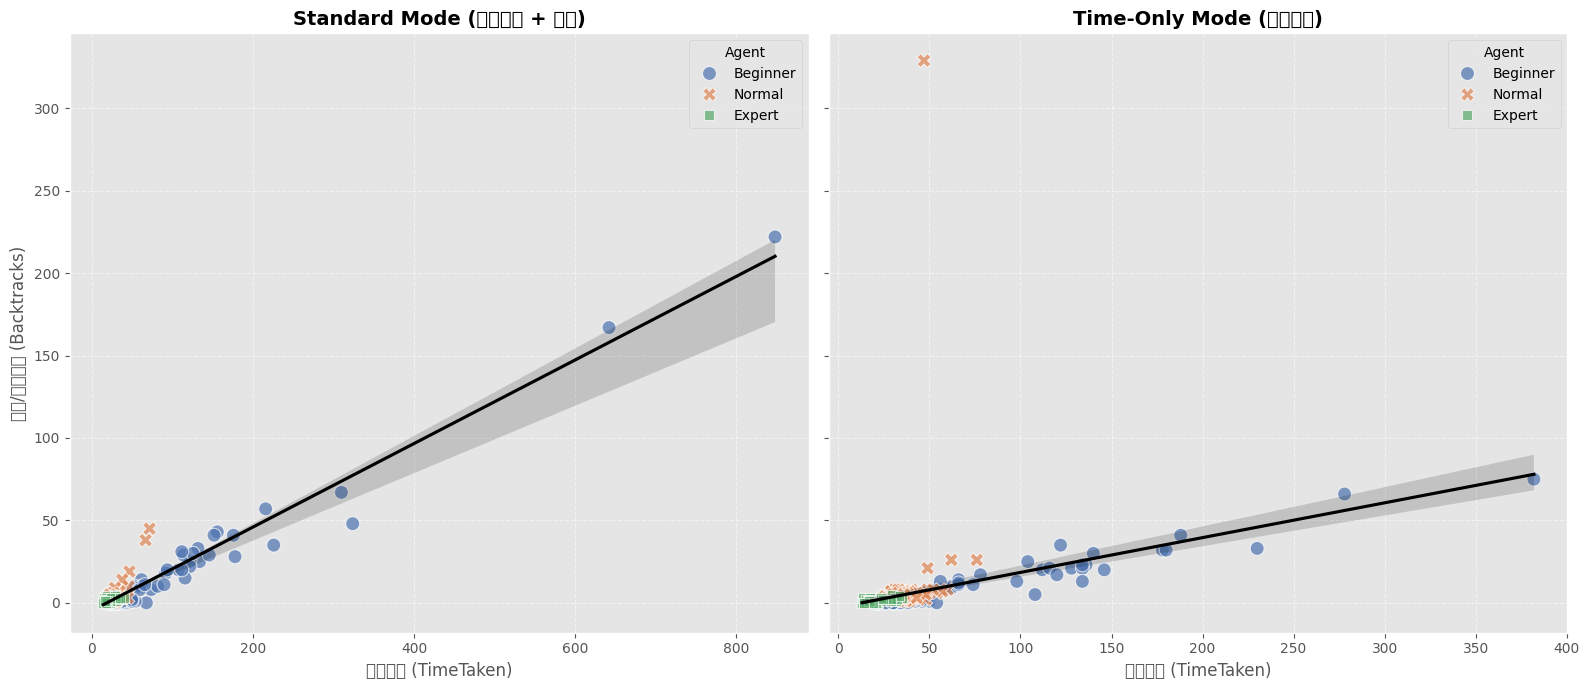

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

sns.scatterplot(
    data=df[df['Mode'] == 'Standard'], 
    x="TimeTaken", 
    y="Backtracks", 
    hue="Agent", 
    style="Agent",
    s=100,
    alpha=0.7,
    palette="deep",
    ax=axes[0]
)
sns.regplot(
    data=df[df['Mode'] == 'Standard'],
    x="TimeTaken",
    y="Backtracks",
    scatter=False,
    ax=axes[0],
    color="black"
)
axes[0].set_title("Standard Mode (考慮時間 + 錯誤)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("解題時間 (TimeTaken)")
axes[0].set_ylabel("回溯/失誤次數 (Backtracks)")
axes[0].grid(True, linestyle='--', alpha=0.5)

sns.scatterplot(
    data=df[df['Mode'] == 'Time'], 
    x="TimeTaken", 
    y="Backtracks", 
    hue="Agent", 
    style="Agent",
    s=100,
    alpha=0.7,
    palette="deep",
    ax=axes[1]
)
sns.regplot(
    data=df[df['Mode'] == 'Time'],
    x="TimeTaken",
    y="Backtracks",
    scatter=False,
    ax=axes[1],
    color="black"
)
axes[1].set_title("Time-Only Mode (只看時間)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("解題時間 (TimeTaken)")
axes[1].set_ylabel("")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

c:\Users\senba\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\senba\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\senba\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\senba\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\senba\AppData\Local\Programs\Python

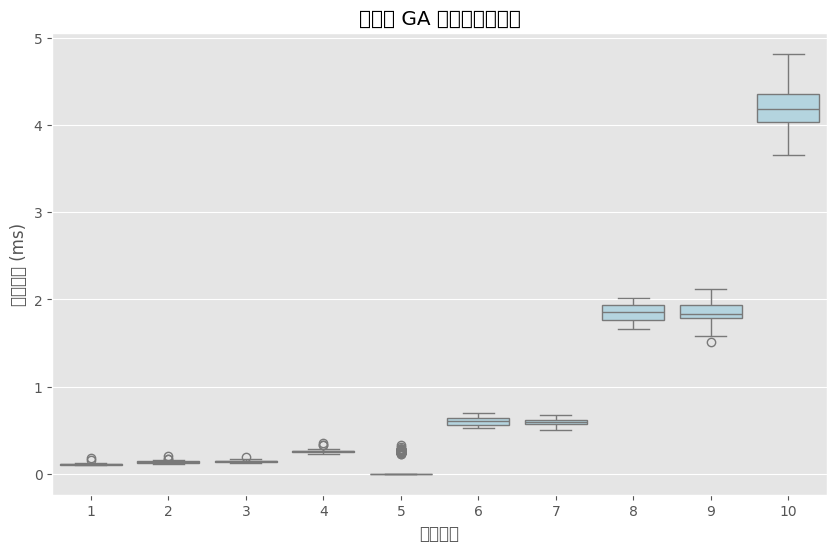

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Difficulty", y="GATime", color="lightblue")
plt.title("難度對 GA 生成時間的影響")
plt.xlabel("難度等級")
plt.ylabel("生成時間 (ms)")
plt.show()

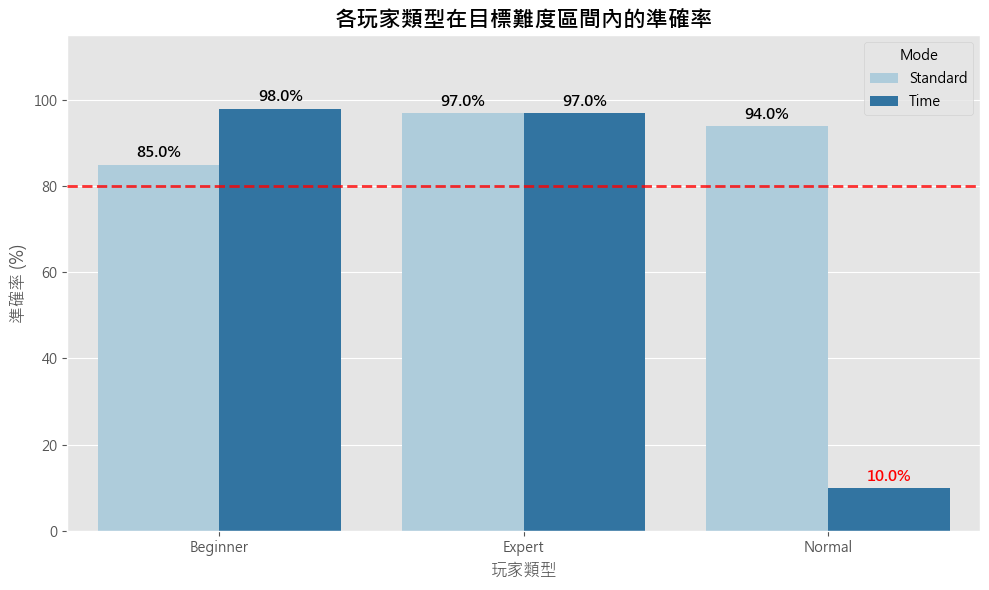

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.family'] = 'Microsoft JhengHei'

df_clean = df[~df['Mode'].str.contains('NoModel', case=False, na=False)].copy()

cond_expert = (df_clean['Agent'] == 'Expert') & (df_clean['Difficulty'] >= 9)
cond_normal = (df_clean['Agent'] == 'Normal') & (df_clean['Difficulty'] >= 4) & (df_clean['Difficulty'] <= 6)
cond_beginner = (df_clean['Agent'] == 'Beginner') & (df_clean['Difficulty'] <= 2)

df_clean['InTargetZone'] = 0
df_clean.loc[cond_expert | cond_normal | cond_beginner, 'InTargetZone'] = 1

accuracy_df = df_clean.groupby(['Mode', 'Agent'])['InTargetZone'].mean().reset_index()
accuracy_df['Accuracy'] = accuracy_df['InTargetZone'] * 100

plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=accuracy_df,
    x="Agent",
    y="Accuracy",
    hue="Mode",
    palette="Paired",
    zorder=1
)

for p in barplot.patches:
    if p.get_height() > 0:
        color = 'red' if p.get_height() < 80 else 'black'
        barplot.annotate(
            f'{p.get_height():.1f}%',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 8),
            textcoords='offset points',
            fontsize=11,
            fontweight='bold',
            color=color
        )

plt.title("各玩家類型在目標難度區間內的準確率", fontsize=16, fontweight='bold')
plt.ylabel("準確率 (%)", fontsize=12)
plt.xlabel("玩家類型", fontsize=12)

plt.ylim(0, 115)

plt.axhline(y=80, color='red', linestyle='--', linewidth=2, alpha=0.8, zorder=5)

plt.tight_layout()
plt.show()